# Chapter 5-3: Multiple Linear Regression

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.api as sm
import matplotlib.pylab as plt

## Example: Predicting the Price of Used Toyota Corolla Cars

A large Toyota car dealership offers purchasers of new Toyota cars the option to buy their used car as part of a trade-in. In particular, a new promotion promises to pay high prices for used Toyota Corolla cars for purchasers of a new car. The dealer then sells the used cars for a small profit. To ensure a reasonable profit, the dealer needs to be able to predict the price that the dealership will get for the used cars. For that reason, data were collected on all previous sales of used Toyota Corollas at the dealership. The data include the `sales price` and other information on the car, such as its `age`, `mileage`, `fuel type`, and `engine size`.

In [24]:
# reduce data frame to the top 1000 rows and select columns for regression analysis
car_df = pd.read_csv('data/ToyotaCorolla.csv')
print(car_df.shape)
print()

car_df.columns

(1436, 39)



Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

Values in the Toyota Corolla example:

 
* `Price` Offer price in Euros
* `Age`  Age in months as of August 2004
* `Kilometers` Accumulated kilometers on odometer
* `Fuel` type Fuel type (Petrol, Diesel, CNG)
* `HP` Horsepower
* `Metallic` Metallic color? (Yes = 1, No = 0)
* `Automatic` Automatic (Yes = 1, No = 0)
* `CC` Cylinder volume in cubic centimeters 
* `Doors` Number of doors
* `QuartTax` Quarterly road tax in Euros
* `Weight` Weight in kilograms

In [25]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price'

# partition data
X = pd.get_dummies(car_df[predictors], drop_first=True, dtype=float)
y = car_df[outcome]
train_X, valid_X, train_y, valid_y \
    = train_test_split(X, y, test_size=0.4, random_state=1)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept:', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))
print()

# print performance measures
print('train R-squared:', car_lm.score(train_X, train_y))
print('valid R-squared:', car_lm.score(valid_X, valid_y))

intercept: -258.6042161509922
           Predictor  coefficient
0          Age_08_04  -124.110305
1                 KM    -0.016059
2                 HP    75.549218
3          Met_Color    47.715778
4          Automatic   462.441526
5                 CC    -5.027585
6              Doors    58.417871
7      Quarterly_Tax    13.009195
8             Weight    14.156177
9   Fuel_Type_Diesel  4481.088703
10  Fuel_Type_Petrol  2413.063717

train R-squared: 0.8740198772919548
valid R-squared: 0.10270749215842112


In [26]:
# use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

         Predicted  Actual     Residual
509   12323.811858   10900 -1423.811858
435   11177.152249   10895  -282.152249
321   14033.803003   10750 -3283.803003
1055   6413.897879    6500    86.102121
288   12724.302918   11895  -829.302918
48    18226.582638   17950  -276.582638
1403   7665.856654    7000  -665.856654
952    9961.900457    8400 -1561.900457
1097   7182.829823    7250    67.170177
204   11985.986724   12950   964.013276
978    9556.854777    8745  -811.854777
404    9938.011124    9450  -488.011124
1338   7456.762516    7499    42.237484
754    8953.201306    9950   996.798694
1189   6873.469434    8500  1626.530566
948    8266.616892    7750  -516.616892
1079   6140.669878    8950  2809.330122
1108   7274.154503    8250   975.845497
107   17074.195776   17450   375.804224
1065   5951.980341    6550   598.019659


Determine the residuals and create a histogram

0.7634782608695653


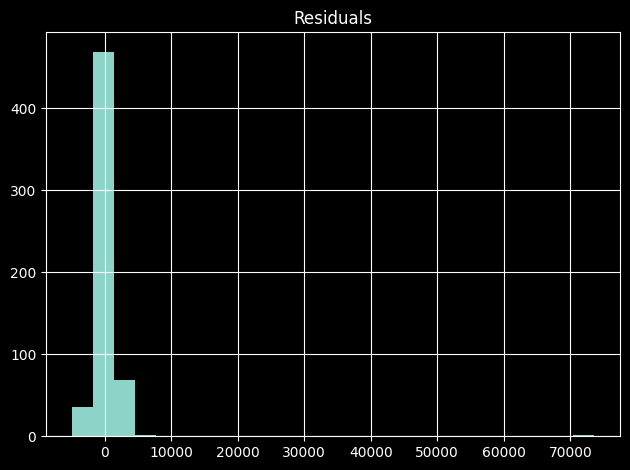

In [27]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[abs(all_residuals)<1406]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

In [28]:
# apply log transformation to the outcome variable
new_train_y = np.log(train_y)
new_valid_y = np.log(valid_y)

# re-fit the linear model using the log-transformed outcome
car_lm_log = LinearRegression()
car_lm_log.fit(train_X, new_train_y)

# print performance measures
print('train R-squared:', car_lm_log.score(train_X, new_train_y))
print('valid R-squared:', car_lm_log.score(valid_X, new_valid_y))

train R-squared: 0.8652525623609486
valid R-squared: 0.7936605802934318


count    575.000000
mean       0.009115
std        0.132552
min       -0.646688
25%       -0.060488
50%        0.012498
75%        0.084408
max        1.553833
Name: Price, dtype: float64


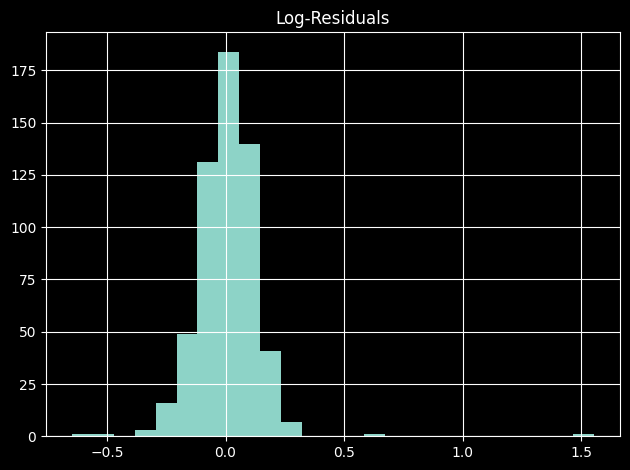

In [29]:
car_lm_log_pred = car_lm_log.predict(valid_X)
new_residuals = new_valid_y - car_lm_log_pred
print(new_residuals.describe())

ax = pd.DataFrame({'Log-Residuals': new_residuals}).hist(bins=25)
plt.tight_layout()
plt.show()

count      575.000000
mean       159.953191
std       1293.278906
min      -3955.048138
25%       -607.241787
50%        134.096722
75%        876.454937
max      14943.289769
Name: Price, dtype: float64


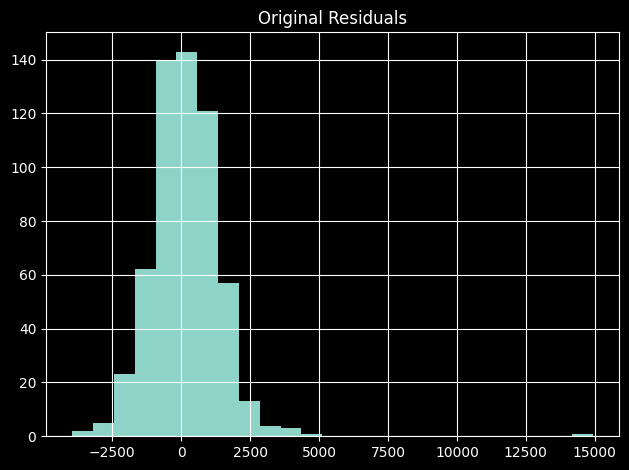

In [39]:
# visualize residuals between the original outcomes and exponentiated predictions
res = valid_y - np.exp(car_lm_log_pred) 
print(res.describe())

ax = pd.DataFrame({'Original Residuals': res}).hist(bins=25)
plt.tight_layout()
plt.show()

In [45]:
print('intercept:', car_lm_log.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm_log.coef_}))
print()

intercept: 8.727878646626106
           Predictor  coefficient
0          Age_08_04    -0.010551
1                 KM    -0.000002
2                 HP     0.003366
3          Met_Color     0.004800
4          Automatic     0.053488
5                 CC    -0.000106
6              Doors     0.008232
7      Quarterly_Tax     0.001284
8             Weight     0.000658
9   Fuel_Type_Diesel     0.131916
10  Fuel_Type_Petrol     0.183795



### Use `statsmodels` to fit linear regression

In [ ]:
train_X, valid_X, train_y, valid_y \
    = train_test_split(X, y, test_size=0.4, random_state=1)

# add a column of 1s to the feature matrix (for the intercept)
train_X1 = sm.add_constant(train_X)
valid_X1 = sm.add_constant(valid_X)

# fit the model using the raw data/feature matrix
model1 = sm.OLS(train_y, train_X1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     535.5
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:38:20   Log-Likelihood:                -7405.4
No. Observations:                 861   AIC:                         1.483e+04
Df Residuals:                     849   BIC:                         1.489e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -258.6042   1551.111  

In [ ]:
from sklearn.preprocessing import StandardScaler

# normalize the features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
valid_X_scaled = scaler.transform(valid_X)
# add a column of 1s to the feature matrix (for the intercept)
train_X_scaled = sm.add_constant(train_X_scaled)
valid_X_scaled = sm.add_constant(valid_X_scaled)

# refit a model using the scaled features
model2 = sm.OLS(train_y, train_X_scaled)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     535.5
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:38:20   Log-Likelihood:                -7405.4
No. Observations:                 861   AIC:                         1.483e+04
Df Residuals:                     849   BIC:                         1.489e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.077e+04     45.149    238.636      0.0

Between `Model1` and `Model2`, which one should we use?

## Regularized Methods

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train_X, valid_X, train_y, valid_y \
    = train_test_split(X, y, test_size=0.4, random_state=1)


lasso = Pipeline([
    ['normalize', StandardScaler()],
    ['model', Lasso(alpha=1)],
])
lasso.fit(train_X, train_y)
print('Lasso')
print('R-squared for the training set:', lasso.score(train_X, train_y))
print('R-squared for the validation set:', lasso.score(valid_X, valid_y))
print()


lasso_cv = Pipeline([
    ['normalize', StandardScaler()],
    ['model', LassoCV(cv=5)],
])
lasso_cv.fit(train_X, train_y)
print('Lasso-CV')
print('R-squared for the training set:', lasso_cv.score(train_X, train_y))
print('R-squared for the validation set:', lasso_cv.score(valid_X, valid_y))
print('Lasso-CV chosen regularization: ', lasso_cv['model'].alpha_)
print(lasso_cv['model'].coef_)
print()


ridge = Pipeline([
    ['normalize', StandardScaler()],
    ['model', Ridge(alpha=1)],
])
ridge.fit(train_X, train_y)
print('Ridge')
print('R-squared for the training set:', ridge.score(train_X, train_y))
print('R-squared for the validation set:', ridge.score(valid_X, valid_y))
print()


bayesianRidge = Pipeline([
    ['normalize', StandardScaler()],
    ['model', BayesianRidge()],
])
bayesianRidge.fit(train_X, train_y)
print('BayesianRidge')
print('R-squared for the training set:', bayesianRidge.score(train_X, train_y))
print('R-squared for the validation set:', bayesianRidge.score(valid_X, valid_y))
print('Bayesian ridge chosen regularization: ', 
      bayesianRidge['model'].lambda_ / bayesianRidge['model'].alpha_)

Lasso
R-squared for the training set: 0.8740127047433279
R-squared for the validation set: 0.137106432696116

Lasso-CV
R-squared for the training set: 0.8739330944962086
R-squared for the validation set: 0.21974123763113085
Lasso-CV chosen regularization:  3.2490254673278853
[-2352.85131594  -608.30796232  1048.76008237    18.83250289
   106.03901005  -867.88989075    46.80019064   526.05069621
   806.71004096  1234.41874558   701.92509825]

Ridge
R-squared for the training set: 0.8740068514907722
R-squared for the validation set: 0.15063088748363673

BayesianRidge
R-squared for the training set: 0.8739823829806066
R-squared for the validation set: 0.18303280187024962
Bayesian ridge chosen regularization:  1.7418534810361945


In [ ]:
linearRegression = Pipeline([
    ['normalize', StandardScaler()],
    ['model', LinearRegression()],
])
linearRegression.fit(train_X, train_y)
print('OLS')
print('R-squared for the training set:', linearRegression.score(train_X, train_y))
print('R-squared for the validation set:', linearRegression.score(valid_X, valid_y))
print()

OLS
R-squared for the training set: 0.8740198772919548
R-squared for the validation set: 0.10270749215842112



In [ ]:
pd.DataFrame({
    'features': train_X.columns, 
    'OLS': linearRegression['model'].coef_, 
    'lassoCV': lasso_cv['model'].coef_, 
    'bayesianRidge': bayesianRidge['model'].coef_,
})

,features,OLS,lassoCV,bayesianRidge
0,Age_08_04,-2351.024903,-2352.851316,-2345.943411
1,KM,-603.261857,-608.307962,-610.442944
2,HP,1106.422467,1048.760082,1065.899345
3,Met_Color,22.493434,18.832503,22.450193
4,Automatic,112.121093,106.039010,109.497863
5,CC,-943.418599,-867.889891,-892.420883
6,Doors,55.637722,46.800191,51.747040
7,Quarterly_Tax,545.396413,526.050696,538.762866
8,Weight,795.818801,806.710041,804.936034
9,Fuel_Type_Diesel,1384.323122,1234.418746,1283.680652


In [ ]:
# run a linear regression of Price on the remaining 11 predictors in the training set
import statsmodels.formula.api as smf

train_X, valid_X, train_y, valid_y \
    = train_test_split(X, y, test_size=0.4, random_state=1)
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'Price ~ ' + ' + '.join(predictors)

car_lm = smf.ols(formula=formula, data=train_df).fit()
print(car_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     535.5
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:38:21   Log-Likelihood:                -7405.4
No. Observations:                 861   AIC:                         1.483e+04
Df Residuals:                     849   BIC:                         1.489e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -258.6042   1551.111  